In [3]:
%load_ext autoreload
%autoreload 2

In [178]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

import mtg

In [167]:
past_games = mtg.PastGames()

/home/mson/.local/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/mson/.local/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: l2_lambda
[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[1]	training's binary_logloss: 0.69111	valid_1's binary_logloss: 0.691138
[2]	training's binary_logloss: 0.689151	valid_1's binary_logloss: 0.689199
[3]	training's binary_logloss: 0.68756	valid_1's binary_logloss: 0.687622
[4]	training's binary_logloss: 0.685996	valid_1's binary_logloss: 0.686065
[5]	training's binary_logloss: 0.684522	valid_1's binary_logloss: 0.684637
[6]	training's binary_logloss: 0.68323	valid_1's binary_logloss: 0.683318
[7]	training's binary_logloss: 0.682056	valid_1's binary_logloss: 0.682177
[8]	training's binary_logloss: 0.680761	valid_1's binary_logloss: 0.680919
[9]	training's binary_logloss: 0.6797	valid_1's binary_logloss: 0.679845
[10]	training's binary_logloss: 0.6787	valid_1's binary_logloss: 0.678902
[11]	training's binary_logloss: 0.677886	valid_1's binary_logloss: 0.678079
[12]	tra

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

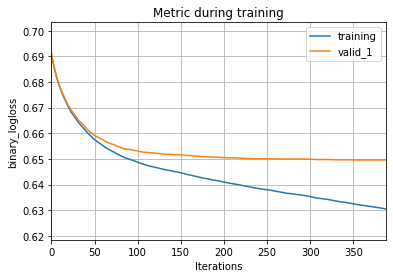

In [173]:
lgb_params = {'objective': 'binary', 'num_leaves': 32, 'l2_lambda': 0.3, 'max_depth': -1}

model = lgb.LGBMClassifier(**lgb_params, num_boost_round=1000)
trn, val = past_games.dsets.sets['trn'], past_games.dsets.sets['val']
model.fit(**past_games.dsets.sets['trn'], eval_set=[(trn['X'], trn['y']), (val['X'], val['y'])],
          early_stopping_rounds=30)

lgb.plot_metric(model)

In [174]:

pred = model.predict(past_games.dsets.sets['tst']['X'])
roc_auc_score(y_true=past_games.dsets.sets['tst']['y'], y_score=pred)

0.6108456004653805

In [179]:
rival_decks = mtg.RivalDecks(past_games)

In [1]:
rival_decks.decks

NameError: name 'rival_decks' is not defined